In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras

In [ ]:
data_dir = '/content/drive/MyDrive/audata/ImageAU/Non_Autistic'
import os

lst = os.listdir(data_dir) # your directory path
number_files = len(lst)
print(number_files)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/audata/ImageAU/Non_Autistic'

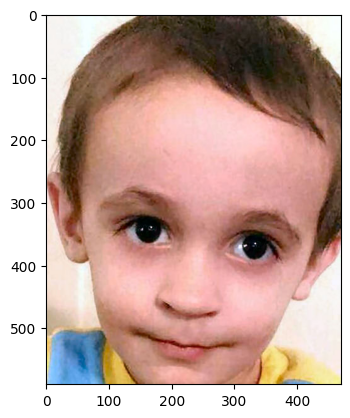

In [ ]:
import cv2
example=cv2.imread('/content/drive/MyDrive/image/train/Autistic/0001.jpg')
example = cv2.cvtColor(example, cv2.COLOR_BGR2RGB)
plt.imshow(example)

In [ ]:
example.shape

(590, 470, 3)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
image_height = 256
batch_size=50
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 1358 files belonging to 2 classes.
Using 1087 files for training.


In [ ]:
class_names = train_ds.class_names

len(class_names)

2

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=3,
  image_size=(image_height, image_height),
  batch_size=batch_size)

Found 1358 files belonging to 2 classes.
Using 271 files for validation.


In [ ]:
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Flatten, Dense

resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=11
history = resnet_model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 381s 16s/step - accuracy: 0.8145 - loss: 0.9347 - val_accuracy: 0.9779 - val_loss: 0.1535
Epoch 2/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 362s 16s/step - accuracy: 0.9791 - loss: 0.1477 - val_accuracy: 0.9779 - val_loss: 0.1075
Epoch 3/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 349s 16s/step - accuracy: 0.9802 - loss: 0.0593 - val_accuracy: 0.9779 - val_loss: 0.1031
Epoch 4/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 387s 16s/step - accuracy: 0.9883 - loss: 0.0391 - val_accuracy: 0.9779 - val_loss: 0.0775
Epoch 5/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 374s 16s/step - accuracy: 0.9881 - loss: 0.0395 - val_accuracy: 0.9779 - val_loss: 0.0783
Epoch 6/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 385s 16s/step - accuracy: 0.9891 - loss: 0.0318 - val_accuracy: 0.9815 - val_loss: 0.0747
Epoch 7/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 362s 15s/step - accuracy: 0.9955 - loss: 0.0246 - val_accuracy: 0.9779 - val_loss: 0.1039
Epoch 8/11
22/22 ━━━━━━━━━━━━━━━━━━━━ 400s 16s/step - accuracy: 0.9933 - loss: 0.0142 - val_accuracy: 0.

In [ ]:
def predict_img(fpath):

    image=cv2.imread(fpath)
    example = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(example)
    image_resized= cv2.resize(image, (image_height,image_height))
    image=np.expand_dims(image_resized,axis=0)
    pred=resnet_model.predict(image)
    output=class_names[np.argmax(pred)]
    print(output)

1/1 [==============================] - 2s 2s/step
Autistic


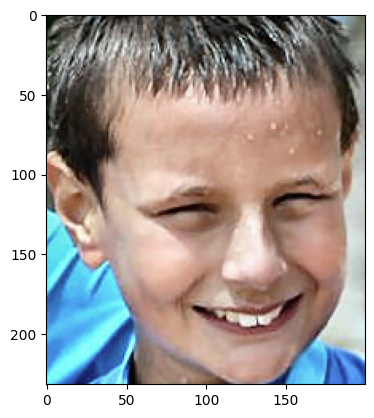

In [ ]:
predict_img('/content/drive/MyDrive/image/test/Autistic/004.jpg')


1/1 [==============================] - 0s 329ms/step
Non_Autistic


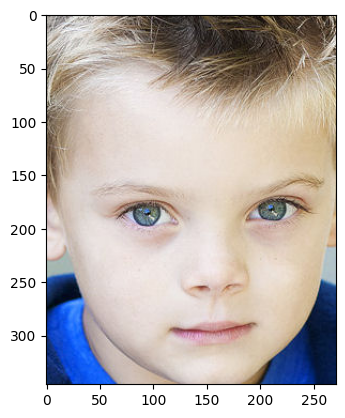

In [ ]:
predict_img('/content/drive/MyDrive/image/test/Non_Autistic/001.jpg')

In [ ]:
resnet_model.save('autistic_resnet_model.keras')


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Load Data
image_height = 256
batch_size = 50

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=3,
    image_size=(image_height, image_height),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=3,
    image_size=(image_height, image_height),
    batch_size=batch_size)

# Model Architecture
resnet_model = Sequential()

pretrained_model = ResNet50(include_top=False,
                            input_shape=(256, 256, 3),
                            pooling='avg',
                            weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.5))  # Adding Dropout for Regularization
resnet_model.add(Dense(15, activation='softmax'))

# Compile Model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train Model with Early Stopping
epochs = 6
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]  # Include Early Stopping
)


Found 1358 files belonging to 2 classes.
Using 1087 files for training.
Found 1358 files belonging to 2 classes.
Using 271 files for validation.
Epoch 1/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 369s 16s/step - accuracy: 0.8308 - loss: 0.7147 - val_accuracy: 0.9779 - val_loss: 0.2433
Epoch 2/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 373s 16s/step - accuracy: 0.9738 - loss: 0.2039 - val_accuracy: 0.9779 - val_loss: 0.1294
Epoch 3/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 379s 16s/step - accuracy: 0.9718 - loss: 0.1369 - val_accuracy: 0.9779 - val_loss: 0.1838
Epoch 4/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 381s 16s/step - accuracy: 0.9822 - loss: 0.0663 - val_accuracy: 0.9779 - val_loss: 0.1087
Epoch 5/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 380s 16s/step - accuracy: 0.9737 - loss: 0.0826 - val_accuracy: 0.9779 - val_loss: 0.0819
Epoch 6/6
22/22 ━━━━━━━━━━━━━━━━━━━━ 382s 16s/step - accuracy: 0.9727 - loss: 0.0830 - val_accuracy: 0.9779 - val_loss: 0.0722


In [ ]:
# Save the trained model
resnet_model.save('resnet_model2.h5')

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Autistic', 'Non_Autistic']


In [ ]:
import cv2
from google.colab import files

def upload_and_predict_opencv(model, target_size=(256, 256)):
    # Upload an image file
    uploaded = files.upload()

    # Get the first (and only) file name
    file_name = list(uploaded.keys())[0]

    # Load the image using OpenCV
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, target_size)  # Resize the image to the target size

    # Preprocess the image
    img_array = np.expand_dims(img, axis=0)  # Expand dims to create batch
    img_array = img_array / 255.0  # Normalize the image to [0, 1]

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # No axes for the image
    plt.show()

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=-1)
    predicted_class_name = class_names[predicted_class_index[0]]

    print(f"Predicted class: {predicted_class_name}")


    return predicted_class_name


predicted_class = upload_and_predict_opencv(resnet_model)

NameError: name 'resnet_model' is not defined

In [ ]:
from tensorflow.keras.models import load_model
import cv2
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

# Load the saved ResNet model
resnet_model = load_model('/content/drive/MyDrive/Models/resnet_model2.h5')

# Assuming you have a list of class names
# Replace this list with your actual class names in the correct order
#class_names = ['Autistic', 'Non_Autistic']  # Example class names

def upload_and_predict_opencv(model, target_size=(256, 256)):
    # Upload an image file
    uploaded = files.upload()

    # Get the first (and only) file name
    file_name = list(uploaded.keys())[0]

    # Load the image using OpenCV
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, target_size)  # Resize the image to the target size

    # Preprocess the image
    img_array = np.expand_dims(img, axis=0)  # Expand dims to create batch
    img_array = img_array / 255.0  # Normalize the image to [0, 1]

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # No axes for the image
    plt.show()

    # Make prediction
    predictions = resnet_model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=-1)
    predicted_class_name = class_names[predicted_class_index[0]]

    print(f"Predicted class: {predicted_class_name}")

    return predicted_class_name

# Call the function to upload an image and predict the class
predicted_class = upload_and_predict_opencv(resnet_model)


AttributeError: Exception encountered when calling Flatten.call().

[1m'list' object has no attribute 'shape'[0m

Arguments received by Flatten.call():
  • args=(['<KerasTensor shape=(None, 2048), dtype=float32, sparse=False, name=keras_tensor_1471>'],)
  • kwargs=<class 'inspect._empty'>